In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures



def load_data(path):
    df = pd.read_csv(path)
    # arham check this later
    # original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
    # split to train test
    train_df, test_df = train_test_split(df, test_size=0.35, random_state=42)
    train_df = train_df.drop(['id'], axis=1).drop_duplicates().reset_index(drop=True)
    test_df = test_df.drop(['id'], axis=1).drop_duplicates().reset_index(drop=True)
    return train_df, test_df

def encode_target(train):
    target_key = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4,'Obesity_Type_II' : 5, 'Obesity_Type_III': 6}
    train['NObeyesdad'] = train['NObeyesdad'].map(target_key)
    return train

def decode_target(train):
    target_key = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'}
    train['NObeyesdad'] = train['NObeyesdad'].map(target_key)
    return train

"""Univar functions"""


def make_gender_binary(train):
    gender_key = { 'Male':0, 'Female':1}
    train['Gender'] = train['Gender'].map(gender_key)
    return train

# let's try three types of solutions:


def age_binning(train_df):
    # Binning
    train_df['Age_Group'] = pd.cut(train_df['Age'], bins=[0, 20, 30, 40, 50, train_df['Age'].max()], labels=['0-20', '21-30', '31-40', '41-50', '50+'],)
    return train_df

def age_scaling_log(train_df):
    train_df['Log_Age'] = np.log1p(train_df['Age'])
    return train_df

def age_scaling_minmax(train_df):
    # scaling
    scaler_age = MinMaxScaler()
    train_df['Scaled_Age'] = scaler_age.fit_transform(train_df['Age'].values.reshape(-1, 1))
    return train_df, scaler_age

def height_scaling_log(train_df):
    train_df['Log_Height'] = np.log1p(train_df['Height'])
    return train_df

def weight_scaling_minmax(train_df):
    # scaling
    scaler_weight = MinMaxScaler()
    train_df['Scaled_Height'] = scaler_weight.fit_transform(train_df['Weight'].values.reshape(-1, 1))
    return train_df, scaler_weight

def height_scaling_log(train_df):
    train_df['Log_Weight'] = np.log1p(train_df['Weight'])
    return train_df

def height_scaling_minmax(train_df):
    # scaling
    scaler_height = MinMaxScaler()
    train_df['Scaled_Weight'] = scaler_height.fit_transform(train_df['Weight'].values.reshape(-1, 1))
    return train_df, scaler_height

def Other_features(train):
    train['BMI'] = train['Weight'] / (train['Height'] ** 2)
    train['Age * Gender'] = train['Age'] * train['Gender']   
    categorical_features = ['Gender', 'family_history_with_overweight', 'Age group', 'FAVC','CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']
    train = pd.get_dummies(train, columns=categorical_features)
    polynomial_features = PolynomialFeatures(degree=2)
    X_poly = polynomial_features.fit_transform(train[['Age', 'BMI']])
    train = pd.concat([train, pd.DataFrame(X_poly, columns=['Age^2', 'Age^3', 'BMI^2', 'Age * BMI', 'Age * BMI2', 'Age * BMI3'])], axis=1)

path = '/Users/arham/Downloads/Projects/01-Dataset/01-Data-for-model-building/train.csv'
train_df,test_df = load_data('/Users/arham/Downloads/Projects/01-Dataset/01-Data-for-model-building/train.csv')


# Gender

Classes appear to be gender sensitive. \
For e.g. Given a man, probability of obesity type II is 31% which for a women is practically zero 

In [17]:
# pivot table gender in column, and NObeyesdad in row, value is count
pivot = train_df.pivot_table(index='NObeyesdad', columns = 'Gender', values='Age', aggfunc='count')
# dataframe
pivot = pd.DataFrame(pivot)

# probability(class|gender) columns add = row/row total
pivot['Pr(Class|Female)'] = round(pivot['Female']/pivot['Female'].sum(),2)
pivot['Pr(Class|Male)'] = round(pivot['Male']/pivot['Male'].sum(),2)

pivot
                                          


Gender,Female,Male,Pr(Class|Female),Pr(Class|Male)
NObeyesdad,,,,
Insufficient_Weight,1059,574,0.16,0.09
Normal_Weight,1056,943,0.16,0.14
Obesity_Type_I,842,1077,0.12,0.16
Obesity_Type_II,5,2081,0.00,0.31
Obesity_Type_III,2639,3,0.39,0.00
Overweight_Level_I,690,890,0.10,0.13
Overweight_Level_II,498,1135,0.07,0.17


# Age

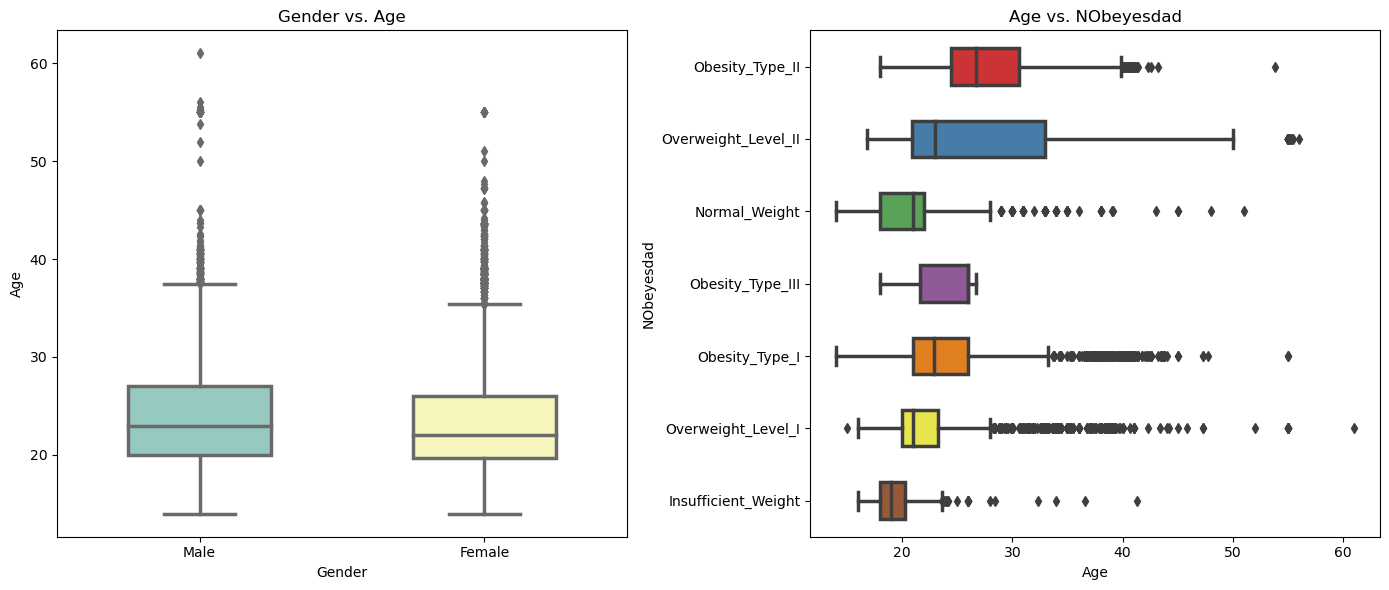

In [18]:
sns.boxplot

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot 1: Gender vs. Age
sns.boxplot(x=train_df['Gender'], y=train_df['Age'], palette='Set3', linewidth=2.5, width=0.5, fliersize=5, ax=axs[0])
axs[0].set_title('Gender vs. Age')

# Boxplot 2: Age vs. NObeyesdad
sns.boxplot(x=train_df['Age'], y=train_df['NObeyesdad'], palette='Set1', linewidth=2.5, width=0.5, fliersize=5, ax=axs[1])
axs[1].set_title('Age vs. NObeyesdad')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##---- final